### Pair Correlation for ICM Organoids

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from scipy.spatial.distance import cdist
from Functions import *

C = pd.read_csv('Data/includingSurfaceDistance/extendedRawDataICMOrganoids.csv')

def graphdistance(tri, Dist, cutoff):
    Gr = nx.Graph()
    
    simplices = tri.simplices[(Dist[tri.simplices[:,0],tri.simplices[:,1]] < cutoff) & 
                              (Dist[tri.simplices[:,0],tri.simplices[:,2]] < cutoff) &
                              (Dist[tri.simplices[:,0],tri.simplices[:,3]] < cutoff) &
                              (Dist[tri.simplices[:,1],tri.simplices[:,2]] < cutoff) & 
                              (Dist[tri.simplices[:,1],tri.simplices[:,3]] < cutoff) &
                              (Dist[tri.simplices[:,2],tri.simplices[:,3]] < cutoff)]
    
    
    for path in simplices:
        nx.add_path(Gr, path)
        
    dist_dict = dict(nx.all_pairs_dijkstra_path_length(Gr))
    dist = np.empty([len(x), len(x)])
    for i in range(len(x)):
        for j in range(len(x)):
            dist[i,j] = dist_dict[i][j]
            
    
    return dist
    

def paircorrelation(Population, Type, GraphDist):
    x = np.zeros(len(Population))
    x[(Population == Type)] = 1
    maxdist = int(np.max(GraphDist))
    ind = np.where(x==1)[0]
    if ind.size == 0:
        P = np.empty(maxdist)
        for i in range(1,maxdist+1):
            P[i-1] = 0
            
    else:
        dist = GraphDist[ind].T[ind].T
        rho0 = sum(x)/len(x)
        rho1 = (sum(x)-1)/(len(x)-1)


        P = np.empty(maxdist)
        for i in range(1,maxdist+1):
            P[i-1] = len(dist[dist==i])/len(GraphDist[GraphDist==i])/rho0/rho1

    return P


N = []
G = []
DN = []
DP = []
nofCells = []
Stage = []
for K in range(max(C['OrganoidID'])):
    Organoids = max(C['OrganoidID'])
    ID = K+1
    Cindex = []
    Cells = []

    for i in range(len(C)):
        if C['OrganoidID'][i] == ID:
            Cindex.append(i)

    x = np.array(C.loc[Cindex,'CentroidX'])
    y = np.array(C.loc[Cindex,'CentroidY'])
    z = np.array(C.loc[Cindex,'CentroidZ'])
    Population = np.array(C.loc[Cindex,'Population'])
    stage = np.array(C.loc[Cindex,'stage'])

    print('Organoid', ID, 'consists of', len(Cindex), 'cells')

    pos = np.empty([len(x), 3])
    pos[:,0] = x
    pos[:,1] = y
    pos[:,2] = z

    Dist = cdist(pos, pos)
    tri = Delaunay(pos)
    GraphDist = graphdistance(tri, Dist, 91)
    
    N.append(paircorrelation(Population, 'N+G-', GraphDist))
    G.append(paircorrelation(Population, 'N-G+', GraphDist))
    DN.append(paircorrelation(Population, 'N-G-', GraphDist))
    DP.append(paircorrelation(Population, 'N+G+',GraphDist))
    Stage.append(stage[0])
    nofCells.append(len(x))

In [ ]:
for i in range(len(N)):
    plt.figure()
    plt.rc('font', size=12)
    plt.plot(N[i], 'm', lw=2, label = 'N+G-')
    plt.plot(G[i], 'c', lw=2, label = 'N-G+')
    #plt.plot(DP[i], 'k--', alpha = 0.5, lw=2, label = 'N+G+')
    #plt.plot(DN[i], 'k', ls='dotted', alpha = 0.5, lw=2, label = 'N-G-')
    plt.title('Organoid ID = '+str(i+1)+ ', Stage ='+str(Stage[i])+', #Cells ='+str(nofCells[i]))
    plt.xlabel('Distance')
    plt.ylabel('$\\rho$')
    plt.legend()
    plt.savefig('Results/Pair Correlations (without DN DP)/ID='+str(i+1)+'.png')

<br>
<br>
<br>

### Pair correlation for non-local model data

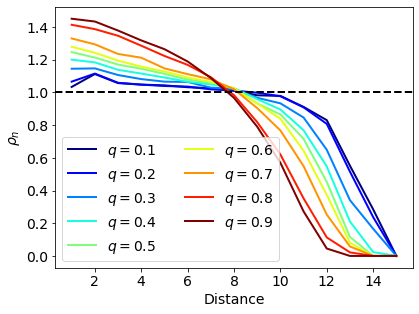

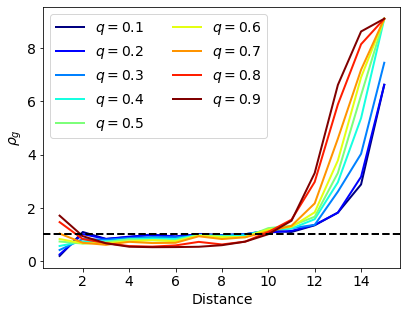

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from FVmesh import initializeFVmesh
from Organoid2D import initializeOrganoid
from Functions import loadData, fate
import networkx as nx

N = np.empty([9,177])
G = np.empty([9,177])

Pos, Radius, N[0,:], G[0,:] = loadData('Results/Publications/Pattern Formation/Cell Fate - q=1_10/Data.csv')
Pos, Radius, N[1,:], G[1,:] = loadData('Results/Publications/Pattern Formation/Cell Fate - q=2_10/Data.csv')
Pos, Radius, N[2,:], G[2,:] = loadData('Results/Publications/Pattern Formation/Cell Fate - q=3_10/Data.csv')
Pos, Radius, N[3,:], G[3,:] = loadData('Results/Publications/Pattern Formation/Cell Fate - q=4_10/Data.csv')
Pos, Radius, N[4,:], G[4,:] = loadData('Results/Publications/Pattern Formation/Cell Fate - q=5_10/Data.csv')
Pos, Radius, N[5,:], G[5,:] = loadData('Results/Publications/Pattern Formation/Cell Fate - q=6_10/Data.csv')
Pos, Radius, N[6,:], G[6,:] = loadData('Results/Publications/Pattern Formation/Cell Fate - q=7_10/Data.csv')
Pos, Radius, N[7,:], G[7,:] = loadData('Results/Publications/Pattern Formation/Cell Fate - q=8_10/Data.csv')
Pos, Radius, N[8,:], G[8,:] = loadData('Results/Publications/Pattern Formation/Cell Fate - q=9_10/Data.csv')

FVmesh = initializeFVmesh(Pos, Radius=Radius)
Gr = nx.Graph()
for path in FVmesh.Tri.simplices:

    path1 = [path[0], path[1]]
    path2 = [path[1], path[2]]
    path3 = [path[2], path[0]]

    if FVmesh.Dist[path1[0],path1[1]] < 2.2:
        nx.add_path(Gr, path1)
    if FVmesh.Dist[path2[0],path2[1]] < 2.2:    
        nx.add_path(Gr, path2)
    if FVmesh.Dist[path3[0],path3[1]] < 2.2:
        nx.add_path(Gr, path3)
    
dist_dict = dict(nx.all_pairs_dijkstra_path_length(Gr))
GraphDist = np.empty([FVmesh.nofCells, FVmesh.nofCells])
for i in range(FVmesh.nofCells):
    for j in range(FVmesh.nofCells):
        GraphDist[i,j] = dist_dict[i][j]

colors = np.linspace(0,1,9)       
cmap = matplotlib.cm.get_cmap('jet')
plt.figure(figsize=[6.4, 4.8])
for i in range(len(N)):
    rgba = cmap(colors[i])
    x = np.array(fate(N[i,:], G[i,:]))
    maxdist = int(np.max(GraphDist))
    ind = np.where(x==1)[0]
    dist = GraphDist[ind].T[ind].T
    rho0 = sum(x)/len(x)
    rho1 = (sum(x)-1)/(len(x)-1)

    Px = np.empty(maxdist)
    for k in range(1,maxdist+1):
        Px[k-1] = len(dist[dist==k])/len(GraphDist[GraphDist==k])/rho0/rho1
        
    plt.rc('font', size=14)
    distances = [j for j in range(1,int(np.max(GraphDist))+1)]
    plt.plot(distances, Px, lw=2, label='$q = '+str((i+1)/10)+'$', color=rgba)
    plt.xlabel('Distance')
    plt.ylabel('$\\rho_n$')

test = np.linspace(0,1,len(PN)-2)
plt.axhline(1, color='k', lw=2, linestyle='--')
plt.legend(ncol=2)
plt.savefig('Results/Publications/Pattern Formation/pair_correlation_n_nonlocal.pdf')
plt.savefig('Results/Publications/Pattern Formation/pair_correlation_n_nonlocal.png')

plt.figure(figsize=[6.4, 4.8])
for i in range(len(N)):
    rgba = cmap(colors[i])
    x = np.array(fate(G[i,:], N[i,:]))
    maxdist = int(np.max(GraphDist))
    ind = np.where(x==1)[0]
    dist = GraphDist[ind].T[ind].T
    rho0 = sum(x)/len(x)
    rho1 = (sum(x)-1)/(len(x)-1)

    Px = np.empty(maxdist)
    for k in range(1,maxdist+1):
        Px[k-1] = len(dist[dist==k])/len(GraphDist[GraphDist==k])/rho0/rho1
        
    plt.rc('font', size=14)
    distances = [j for j in range(1,int(np.max(GraphDist))+1)]
    plt.plot(distances, Px, lw=2, label='$q = '+str((i+1)/10)+'$', color=rgba)
    plt.xlabel('Distance')
    plt.ylabel('$\\rho_g$')

plt.axhline(1, color='k', lw=2, linestyle='--')
plt.legend(ncol=2)
plt.savefig('Results/Publications/Pattern Formation/pair_correlation_g_nonlocal.pdf')
plt.savefig('Results/Publications/Pattern Formation/pair_correlation_g_nonlocal.png')

<br>
<br>
<br>

### Pair correlation / cell ratio for local model data

Text(0, 0.5, 'Proportion')

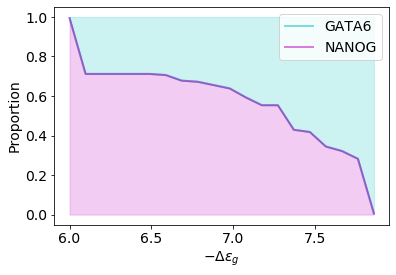

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from random import gauss
from FVmesh import initializeFVmesh
from Organoid2D import initializeOrganoid
from Functions import coverPlot, saveData, paircorrelation, fate
from Model import rhs_activation
from Parameters import setParameters
from scipy.integrate import solve_ivp
import networkx as nx
import pandas as pd
import os

def paircorrelation(N, G, GraphDist):
    x = np.zeros(len(N))
    x[N > G] = 1
    maxdist = int(np.max(GraphDist))
    ind = np.where(x==1)[0]
    if ind.size == 0:
        P = np.empty(maxdist)
        for i in range(1,maxdist+1):
            P[i-1] = 0
            
    else:
        dist = GraphDist[ind].T[ind].T
        rho0 = sum(x)/len(x)
        rho1 = (sum(x)-1)/(len(x)-1)


        P = np.empty(maxdist)
        for i in range(1,maxdist+1):
            P[i-1] = len(dist[dist==i])/len(GraphDist[GraphDist==i])/rho0/rho1

    return P


Prm = setParameters()
#Organoid = initializeOrganoid(Prm)
Pos = np.array(pd.read_csv('testOrganoid.csv'))
Radius = np.ones(len(Pos))*1.1
FVmesh = initializeFVmesh(Pos, Radius=Radius)


x0 = [Prm.r_N/Prm.gamma_N*3/4, Prm.r_G/Prm.gamma_G*3/4]
xInit = np.array([gauss(x0[0],x0[0]*0.01) if i < FVmesh.nofCells else 
                  gauss(x0[1],x0[1]*0.01) for i in range(2*FVmesh.nofCells)])

eps_G = np.linspace(6,7.86,20)
Ratio = np.empty(eps_G.shape)
PN = np.empty([len(eps_G), int(np.max(FVmesh.GraphDist))])
PG = np.empty([len(eps_G), int(np.max(FVmesh.GraphDist))])

for i in range(len(eps_G)):
    Prm.eps_G = -eps_G[i]
    Prm.T = 2400
    Prm.nofSteps = 3000
    t = np.linspace(0,Prm.T,Prm.nofSteps)
    rhs = lambda t,x: rhs_activation(0, x, Prm, FVmesh)
    sol = solve_ivp(rhs, [0,Prm.T], xInit, t_eval = t, method = 'Radau')

    N = sol.y[:FVmesh.nofCells,-1]
    G = sol.y[FVmesh.nofCells:,-1]

    F = fate(N, G)
    PN[i,:] = paircorrelation(N, G, FVmesh.GraphDist)
    PG[i,:] = paircorrelation(G, N, FVmesh.GraphDist)

    Ratio[i] = np.sum(F)/FVmesh.nofCells



plt.rc('font', size=14)
plt.plot(eps_G, Ratio, 'c', alpha=0.5, lw=2, label = 'GATA6')
plt.plot(eps_G, Ratio, 'm', alpha=0.5, lw=2, label = 'NANOG')
plt.fill_between(eps_G, Ratio, 1, color='c', alpha = 0.2)
plt.fill_between(eps_G, 0, Ratio, color='m', alpha = 0.2)
plt.legend()
plt.xlabel('$-\Delta\epsilon_g$')
plt.ylabel('Proportion')

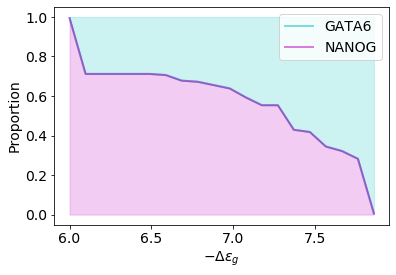

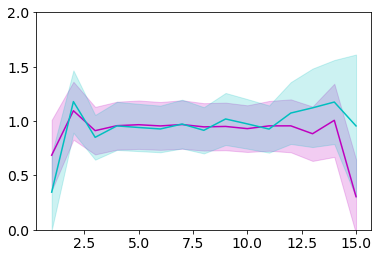

In [21]:
plt.figure()
plt.rc('font', size=14)
plt.plot(eps_G, Ratio, 'c', alpha=0.5, lw=2, label = 'GATA6')
plt.plot(eps_G, Ratio, 'm', alpha=0.5, lw=2, label = 'NANOG')
plt.fill_between(eps_G, Ratio, 1, color='c', alpha = 0.2)
plt.fill_between(eps_G, 0, Ratio, color='m', alpha = 0.2)
plt.legend()
plt.xlabel('$-\Delta\epsilon_g$')
plt.ylabel('Proportion')
#plt.savefig('Results/Publications/Pattern Formation/Proportions.pdf')
#plt.savefig('Results/Publications/Pattern Formation/Proportions.png')

PN_mean = np.mean(PN, axis=0)
PN_std = np.std(PN, axis=0)
PG_mean = np.mean(PG, axis=0)
PG_std = np.std(PG, axis=0)


plt.figure()
plt.rc('font', size=14)
distances = [j for j in range(1,int(np.max(FVmesh.GraphDist))+1)]
plt.plot(distances, PN_mean, 'm')
plt.fill_between(distances, PN_mean-PN_std, PN_mean+PN_std, color='m', alpha = 0.2)
plt.ylim([0,2])

plt.rc('font', size=14)
distances = [j for j in range(1,int(np.max(FVmesh.GraphDist))+1)]
plt.plot(distances, PG_mean, 'c')
plt.fill_between(distances, PG_mean-PG_std, PG_mean+PG_std, color='c', alpha = 0.2)

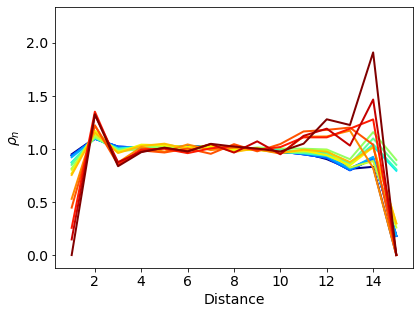

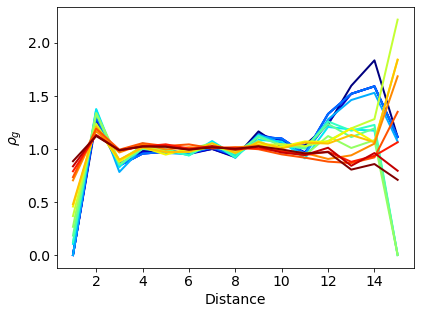

In [148]:
import matplotlib

cmap = matplotlib.cm.get_cmap('jet')
test = np.linspace(0,1,len(PN)-2)
distances = [j for j in range(1,int(np.max(FVmesh.GraphDist))+1)]
plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
for i in range(len(PN)-2):
    rgba = cmap(test[i])
    
    plt.plot(distances,PN[i+1,:], color = rgba, lw=2)
plt.xlabel('Distance')
plt.ylabel('$\\rho_n$')
plt.ylim([0-0.12, max([np.max(PN), np.max(PG)])+0.12])
plt.savefig('Results/Publications/Pattern Formation/pair_correlation_n_local.pdf')
plt.savefig('Results/Publications/Pattern Formation/pair_correlation_n_local.png')

plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
for i in range(len(PG)-2):
    rgba = cmap(test[i])
    
    plt.plot(distances,PG[i+1,:], color = rgba, lw=2)
plt.xlabel('Distance')
plt.ylabel('$\\rho_g$')
plt.ylim([0-0.12, max([np.max(PN), np.max(PG)])+0.12])
#sm = plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
#cbar = plt.colorbar(sm)
#cbar.ax.set_yticklabels([])
#cbar.set_label('$-\Delta\epsilon_g$')
plt.savefig('Results/Publications/Pattern Formation/pair_correlation_g_local.pdf')
plt.savefig('Results/Publications/Pattern Formation/pair_correlation_g_local.png')

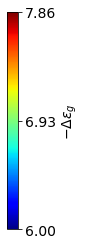

In [142]:
a = np.array([[6,7.86]])
plt.figure(figsize=(10, 4))
img = plt.imshow(a, cmap="jet")
plt.gca().set_visible(False)
plt.colorbar(orientation="vertical", label='$-\Delta\epsilon_g$', ticks=[6,6.93,7.86])
plt.savefig("Results/Publications/Pattern Formation/colorbar_local.pdf")
plt.savefig("Results/Publications/Pattern Formation/colorbar_local.png")